In [5]:
%matplotlib inline
import numpy as np
from image_reader import Image_reader
from caption_generator import Caption_generator
import matplotlib.pyplot as plt

#Instantiate image_reader with GoogleNet mean image
mean_image = np.array([104, 117, 123]).reshape((3,1,1))
image_reader=Image_reader(mean=mean_image)

#Instantiate caption generator
caption_model_place='../models/caption_model.chainer'
cnn_model_place='../data/bvlc_googlenet_caffe_chainer.pkl'
index2word_place='../work/index2token.pkl'
#caption_generator=Caption_generator(caption_model_place=caption_model_place,cnn_model_place=cnn_model_place,index2word_place=index2word_place)
caption_generator=Caption_generator(caption_model_place=caption_model_place,cnn_model_place=cnn_model_place,index2word_place=index2word_place,beamsize=20)

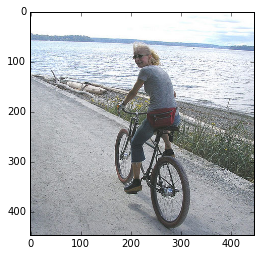

In [2]:
#The preparation is done
#Let's ganarate caption for a image

#How about this one?
image_file_path='../images/test_image.jpg'
im = plt.imread(image_file_path)
plt.imshow(im)

In [7]:
#First, read an image as numpy array
image_file_path='../images/test_image.jpg'
image=image_reader.read(image_file_path)
#Next, put the image into caption generator
#The output structure is 
#	[caption,caption,caption,...]
#	caption = {"sentence":This is a generated sentence, "probability": The probability of the generated sentence} 
captions=caption_generator.generate(image)

#For example, if you want to print all captions
for caption in captions:
    sentence=caption['sentence']
    probability=caption['probability']
    #score=caption['log_probability']
    print " ".join(sentence),probability

a man riding a bike down a street 0.0036873362381
a man riding a bike down the street 0.00326928869692
a person riding a bike on a street 0.00275348457724
a man riding a bike on the beach 0.00260653878443
a man riding a bike down the road 0.00204368062299
a person riding a bike on a road 0.00181833637517
a man riding a bike down a road 0.00170924747556
a man riding a bike on a beach 0.00160106191187
a man riding a bike on the street 0.00155417710711
a person riding a bike on a beach 0.00154660121521
a man riding a bike on a street 0.00150733184744
a person riding a bike on a city street 0.00258173322764
a man riding on the back of a bike 0.00187144932226
a person riding a bike on a dirt road 0.00171306254897
a man riding on the back of a motorcycle 0.001511801067
a man is riding a bike on the beach 0.00115415750444
a man riding on the back of a bicycle 0.00102733478164
a man riding a bike on the side of a road 0.00113330978855
a man riding a bike on the side of the road 0.0009348279342

In [8]:
print caption_generator.get_top_sentence(image)

a man riding a bike down a street


In [ ]:
#Let's do for another image
image_file_path='../images/COCO_val2014_000000185546.jpg'
im = plt.imread(image_file_path)
plt.imshow(im)

In [ ]:
image_file_path='../images/COCO_val2014_000000185546.jpg'
image=image_reader.read(image_file_path)
captions=caption_generator.generate(image)
for caption in captions:
    sentence=caption['sentence']
    probability=caption['probability']
    print " ".join(sentence),probability

In [ ]:
#Sample for other images

def sample_generate(image_file_path):
    im = plt.imread(image_file_path)
    plt.figure()
    plt.imshow(im)
    plt.show()
    image=image_reader.read(image_file_path)
    captions=caption_generator.generate(image)
    for caption in captions:
        sentence=caption['sentence']
        probability=caption['probability']
        print " ".join(sentence),probability

images=[
'../images/COCO_val2014_000000192091.jpg',
'../images/COCO_val2014_000000229948.jpg',
'../images/COCO_val2014_000000241747.jpg',
'../images/COCO_val2014_000000250790.jpg',
'../images/COCO_val2014_000000277533.jpg',
'../images/COCO_val2014_000000285505.jpg',
'../images/COCO_val2014_000000323758.jpg',
'../images/COCO_val2014_000000326128.jpg',
'../images/COCO_val2014_000000397427.jpg',
'../images/COCO_val2014_000000553761.jpg',
]

for image in images:
    sample_generate(image)